In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 216 GB / percent used: 14.2 %


# Check model data

In [3]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 't2m'

In [4]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, presnivs: 79, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered         (time_counter) object ...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    aire                  (lat, lon) float32 ...
    t2m                   (time_counter, lat, lon) float32 ...
Attributes:
    name:                      histmth
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:18:38 GMT
    uuid:                      edd88a50-9cee-4920-b578-60394b07505d
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 16:38:41 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

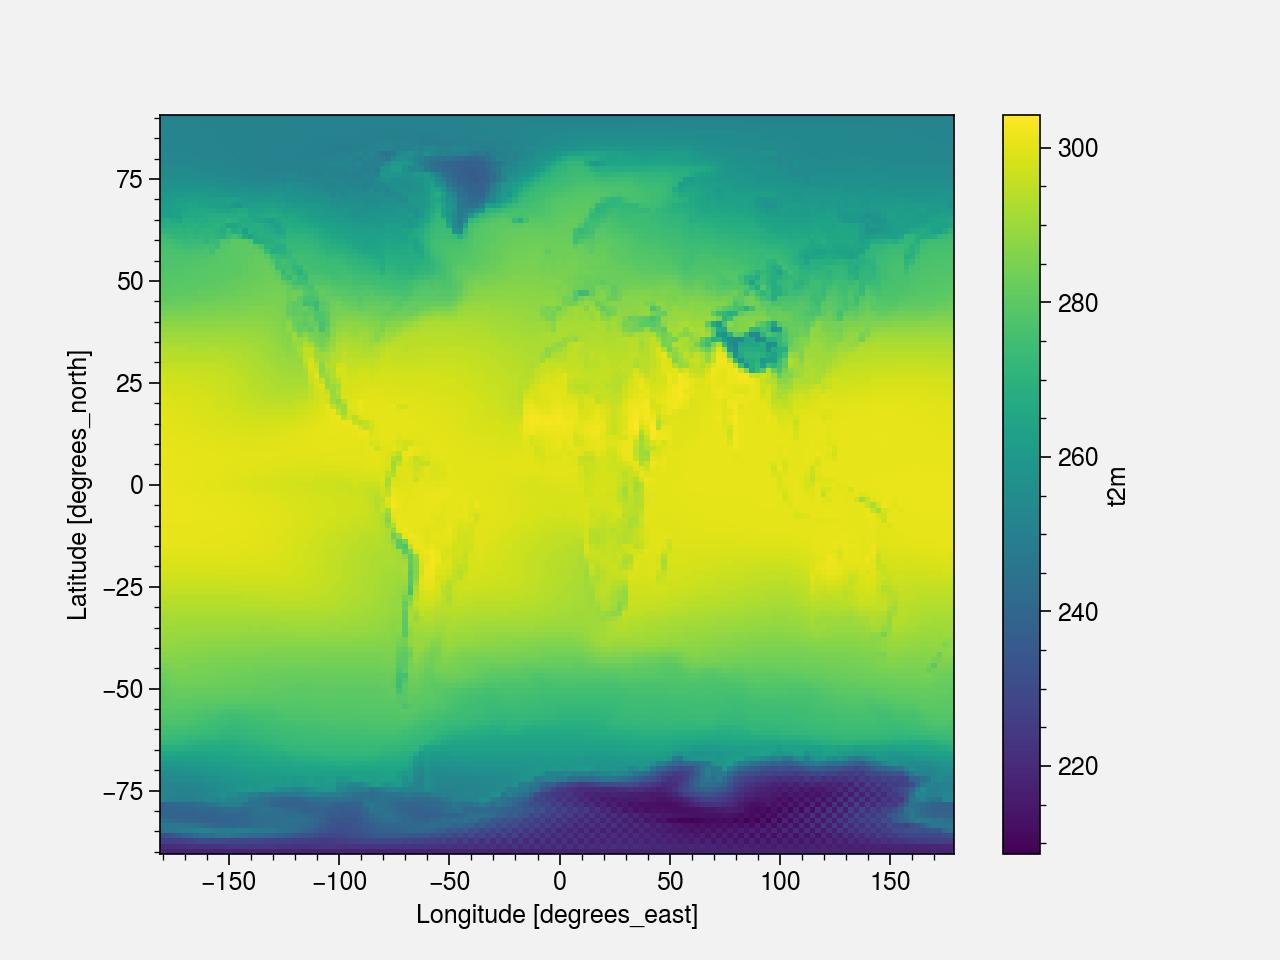

In [6]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

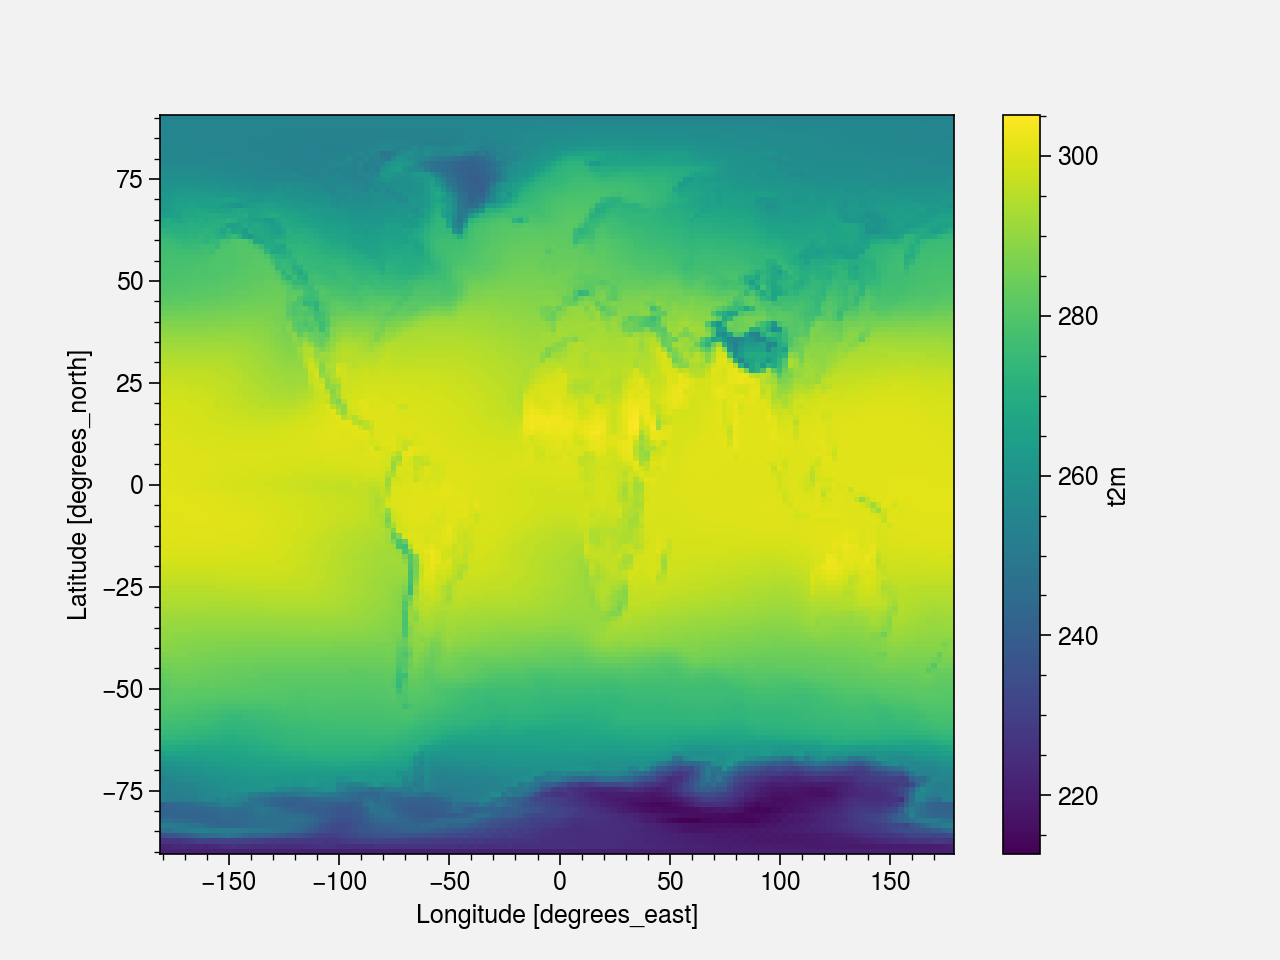

In [8]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').plot()

# Define period and zone

In [9]:
# Define common period
period = slice('1999','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'tas'
label = 'Near-Surface Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-30,30,5)

# Get model data guided and not guided

In [10]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'}) - 273.15
model_guided.attrs['units'] = '°C'
model_guided

<xarray.DataArray 't2m' (time: 192, lat: 143, lon: 144)>
array([[[-41.459198, -41.459198, -41.459198, ..., -41.459198,
         -41.459198, -41.459198],
        [-39.84993 , -39.99518 , -39.92801 , ..., -39.78737 ,
         -39.76378 , -39.85318 ],
        [-40.87204 , -41.27809 , -40.668808, ..., -40.760345,
         -40.004257, -40.82007 ],
        ...,
        [-25.823578, -25.68927 , -25.410019, ..., -26.41011 ,
         -26.149368, -26.152832],
        [-27.693527, -27.545593, -27.492264, ..., -27.745316,
         -27.833038, -27.655807],
        [-27.51442 , -27.51442 , -27.51442 , ..., -27.51442 ,
         -27.51442 , -27.51442 ]],

       [[-46.41873 , -46.41873 , -46.41873 , ..., -46.41873 ,
         -46.41873 , -46.41873 ],
        [-44.57553 , -44.455   , -44.674423, ..., -44.890396,
         -44.61766 , -44.542908],
        [-44.09146 , -45.09015 , -43.934937, ..., -44.26544 ,
         -44.337494, -44.652634],
        ...,
        [-38.551163, -38.21588 , -37.975677, ..., -38.16858 ,
         -38.430374, -38.353577],
        [-41.35527 , -41.242798, -41.02887 , ..., -41.859528,
         -41.661163, -41.65747 ],
        [-42.833298, -42.833298, -42.833298, ..., -42.833298,
         -42.833298, -42.833298]],

       [[-40.6241  , -40.6241  , -40.6241  , ..., -40.6241  ,
         -40.6241  , -40.6241  ],
        [-37.710724, -37.859085, -37.63002 , ..., -37.781326,
         -38.05542 , -37.522415],
        [-37.255417, -37.192917, -37.525818, ..., -37.909622,
         -37.152847, -37.582428],
        ...,
        [-49.14595 , -48.979782, -48.362167, ..., -48.393524,
         -48.669876, -48.605713],
        [-55.453278, -54.814667, -54.16823 , ..., -56.173294,
         -56.194443, -55.52571 ],
        [-59.316223, -59.316223, -59.316223, ..., -59.316223,
         -59.316223, -59.316223]],

       ...,

       [[-21.11119 , -21.11119 , -21.11119 , ..., -21.11119 ,
         -21.11119 , -21.11119 ],
        [-23.1212  , -22.088135, -23.04924 , ..., -21.559402,
         -22.556793, -21.703094],
        [-23.652084, -23.044678, -24.24205 , ..., -22.028793,
         -23.705002, -22.10318 ],
        ...,
        [-48.822662, -48.693466, -48.287018, ..., -48.388214,
         -48.59883 , -48.776398],
        [-55.348114, -54.98146 , -54.574615, ..., -56.19281 ,
         -56.171097, -55.81807 ],
        [-55.762863, -55.762863, -55.762863, ..., -55.762863,
         -55.762863, -55.762863]],

       [[-34.926544, -34.926544, -34.926544, ..., -34.926544,
         -34.926544, -34.926544],
        [-32.298904, -32.85173 , -32.41971 , ..., -32.74144 ,
         -32.196533, -32.599472],
        [-32.655807, -32.201355, -33.0571  , ..., -32.104355,
         -32.7043  , -31.92804 ],
        ...,
        [-36.487854, -36.120987, -35.856705, ..., -36.59413 ,
         -36.614944, -36.42958 ],
        [-39.405838, -39.43135 , -39.21785 , ..., -39.76941 ,
         -39.661987, -39.6064  ],
        [-38.388184, -38.388184, -38.388184, ..., -38.388184,
         -38.388184, -38.388184]],

       [[-37.679276, -37.679276, -37.679276, ..., -37.679276,
         -37.679276, -37.679276],
        [-35.787674, -35.617798, -35.835907, ..., -35.569107,
         -35.573242, -35.47487 ],
        [-35.21881 , -35.731476, -35.37178 , ..., -34.874725,
         -35.360046, -35.35791 ],
        ...,
        [-28.085953, -27.819626, -27.593887, ..., -28.479004,
         -28.466858, -28.264923],
        [-29.231598, -29.186981, -29.129456, ..., -29.315125,
         -29.28003 , -29.249176],
        [-28.41156 , -28.41156 , -28.41156 , ..., -28.41156 ,
         -28.41156 , -28.41156 ]]], dtype=float32)
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered  (time) object ...
Attributes:
    units:    °C

In [56]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'}) - 273.15
model.attrs['units'] = '°C'
model

<xarray.DataArray 't2m' (time: 192, lat: 143, lon: 144)>
array([[[-31.558273, -31.558273, -31.558273, ..., -31.558273,
         -31.558273, -31.558273],
        [-30.611511, -30.574615, -30.648834, ..., -30.535553,
         -30.52118 , -30.603073],
        [-33.88217 , -34.536987, -33.582794, ..., -33.824768,
         -33.668945, -34.31909 ],
        ...,
        [-28.102524, -27.785767, -27.444504, ..., -28.474182,
         -28.386566, -28.349731],
        [-30.048828, -29.789536, -29.88234 , ..., -30.057724,
         -30.127716, -29.93251 ],
        [-29.414627, -29.414627, -29.414627, ..., -29.414627,
         -29.414627, -29.414627]],

       [[-39.88846 , -39.88846 , -39.88846 , ..., -39.88846 ,
         -39.88846 , -39.88846 ],
        [-38.15097 , -38.135025, -38.3712  , ..., -38.178223,
         -38.295   , -38.18936 ],
        [-38.9852  , -38.626846, -38.696594, ..., -38.64305 ,
         -38.986893, -38.32892 ],
        ...,
        [-40.575363, -40.3869  , -39.99344 , ..., -40.207336,
         -40.323242, -40.524612],
        [-44.430115, -43.962875, -43.925674, ..., -44.80223 ,
         -44.800995, -44.238007],
        [-44.21788 , -44.21788 , -44.21788 , ..., -44.21788 ,
         -44.21788 , -44.21788 ]],

       [[-47.490982, -47.490982, -47.490982, ..., -47.490982,
         -47.490982, -47.490982],
        [-45.05841 , -45.072586, -45.027176, ..., -45.11035 ,
         -44.99008 , -45.086105],
        [-44.77156 , -45.231842, -44.69876 , ..., -45.171646,
         -44.74263 , -45.172775],
        ...,
        [-52.784668, -52.919495, -53.11528 , ..., -51.774124,
         -51.93454 , -52.748413],
        [-61.12227 , -60.65985 , -60.185577, ..., -62.921005,
         -62.324966, -61.546524],
        [-58.869568, -58.869568, -58.869568, ..., -58.869568,
         -58.869568, -58.869568]],

       ...,

       [[-20.367905, -20.367905, -20.367905, ..., -20.367905,
         -20.367905, -20.367905],
        [-19.577652, -19.457535, -19.593338, ..., -19.11145 ,
         -19.307587, -19.399933],
        [-19.423141, -20.078674, -19.806366, ..., -19.454498,
         -19.267197, -19.881042],
        ...,
        [-49.83171 , -49.760178, -49.999924, ..., -47.57509 ,
         -47.995346, -48.98729 ],
        [-55.025543, -53.895462, -53.466248, ..., -57.103333,
         -56.769516, -55.397095],
        [-54.09532 , -54.09532 , -54.09532 , ..., -54.09532 ,
         -54.09532 , -54.09532 ]],

       [[-32.85286 , -32.85286 , -32.85286 , ..., -32.85286 ,
         -32.85286 , -32.85286 ],
        [-29.266113, -29.191162, -29.464417, ..., -29.050919,
         -29.191605, -29.066406],
        [-28.599487, -28.952927, -28.846634, ..., -28.743958,
         -28.974518, -28.907349],
        ...,
        [-36.446045, -36.192917, -35.58467 , ..., -36.449112,
         -36.467316, -36.638123],
        [-39.272217, -39.31006 , -39.071243, ..., -39.702164,
         -39.604065, -39.483856],
        [-40.37503 , -40.37503 , -40.37503 , ..., -40.37503 ,
         -40.37503 , -40.37503 ]],

       [[-35.67743 , -35.67743 , -35.67743 , ..., -35.67743 ,
         -35.67743 , -35.67743 ],
        [-33.299774, -33.82982 , -33.23387 , ..., -33.863235,
         -33.18582 , -34.07469 ],
        [-32.095734, -33.0179  , -32.172104, ..., -32.27176 ,
         -32.02057 , -32.55406 ],
        ...,
        [-28.264893, -27.987122, -27.65828 , ..., -28.635376,
         -28.577515, -28.502274],
        [-29.818253, -29.774506, -29.739105, ..., -29.907394,
         -29.895859, -29.808258],
        [-29.330566, -29.330566, -29.330566, ..., -29.330566,
         -29.330566, -29.330566]]], dtype=float32)
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered  (time) object ...
Attributes:
    units:    °C

# Compute climatologies

In [12]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [57]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load obs
## cru_ts4.00
More recent version available: https://crudata.uea.ac.uk/cru/data/hrg/  
-> pas évident à télécharger encore... les netCDF ne sont pas reconnus directement, je vais rester du coup sur la version 4.00 sur CICLAD

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Temperature.ipynb

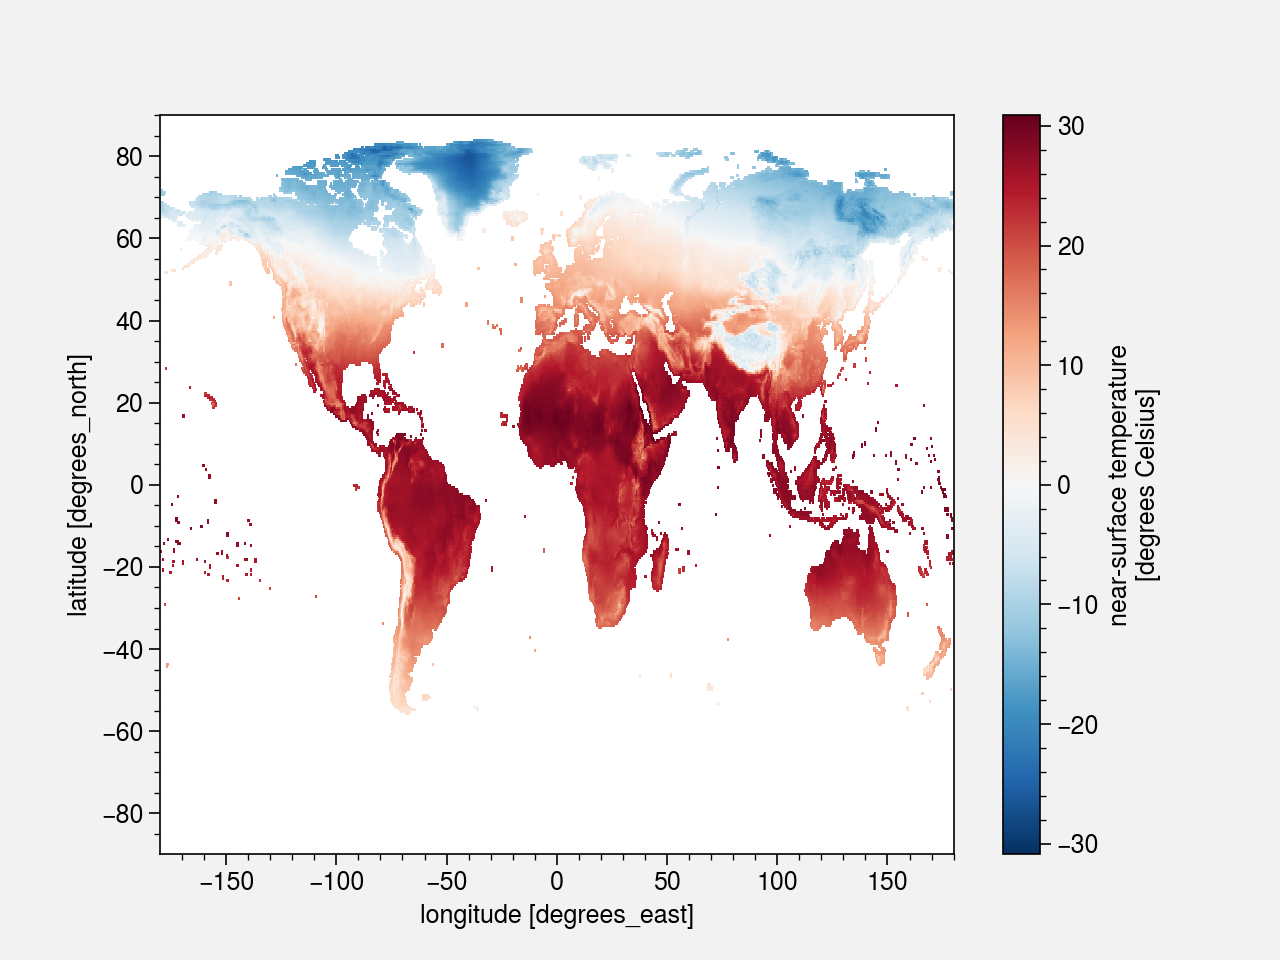

In [52]:
obs_longname = 'CRU TS v. 4.00'
obs_name = 'CRU'

obs = xr.open_dataset('/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.1901.2015.tmp.dat.nc').sel(time=period).tmp
obs_clim = u.clim(obs, calendar=obs.time.encoding['calendar'])
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

In [54]:
# Make the regrider
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=True, reuse_weights=True)
print(regridder)

# Regrid the data
obs_clim_regrid = regridder(obs_clim)

Create weight file: bilinear_360x720_143x144_peri.nc
xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_360x720_143x144_peri.nc 
Reuse pre-computed weights? True 
Input grid shape:           (360, 720) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True


# Plot differences

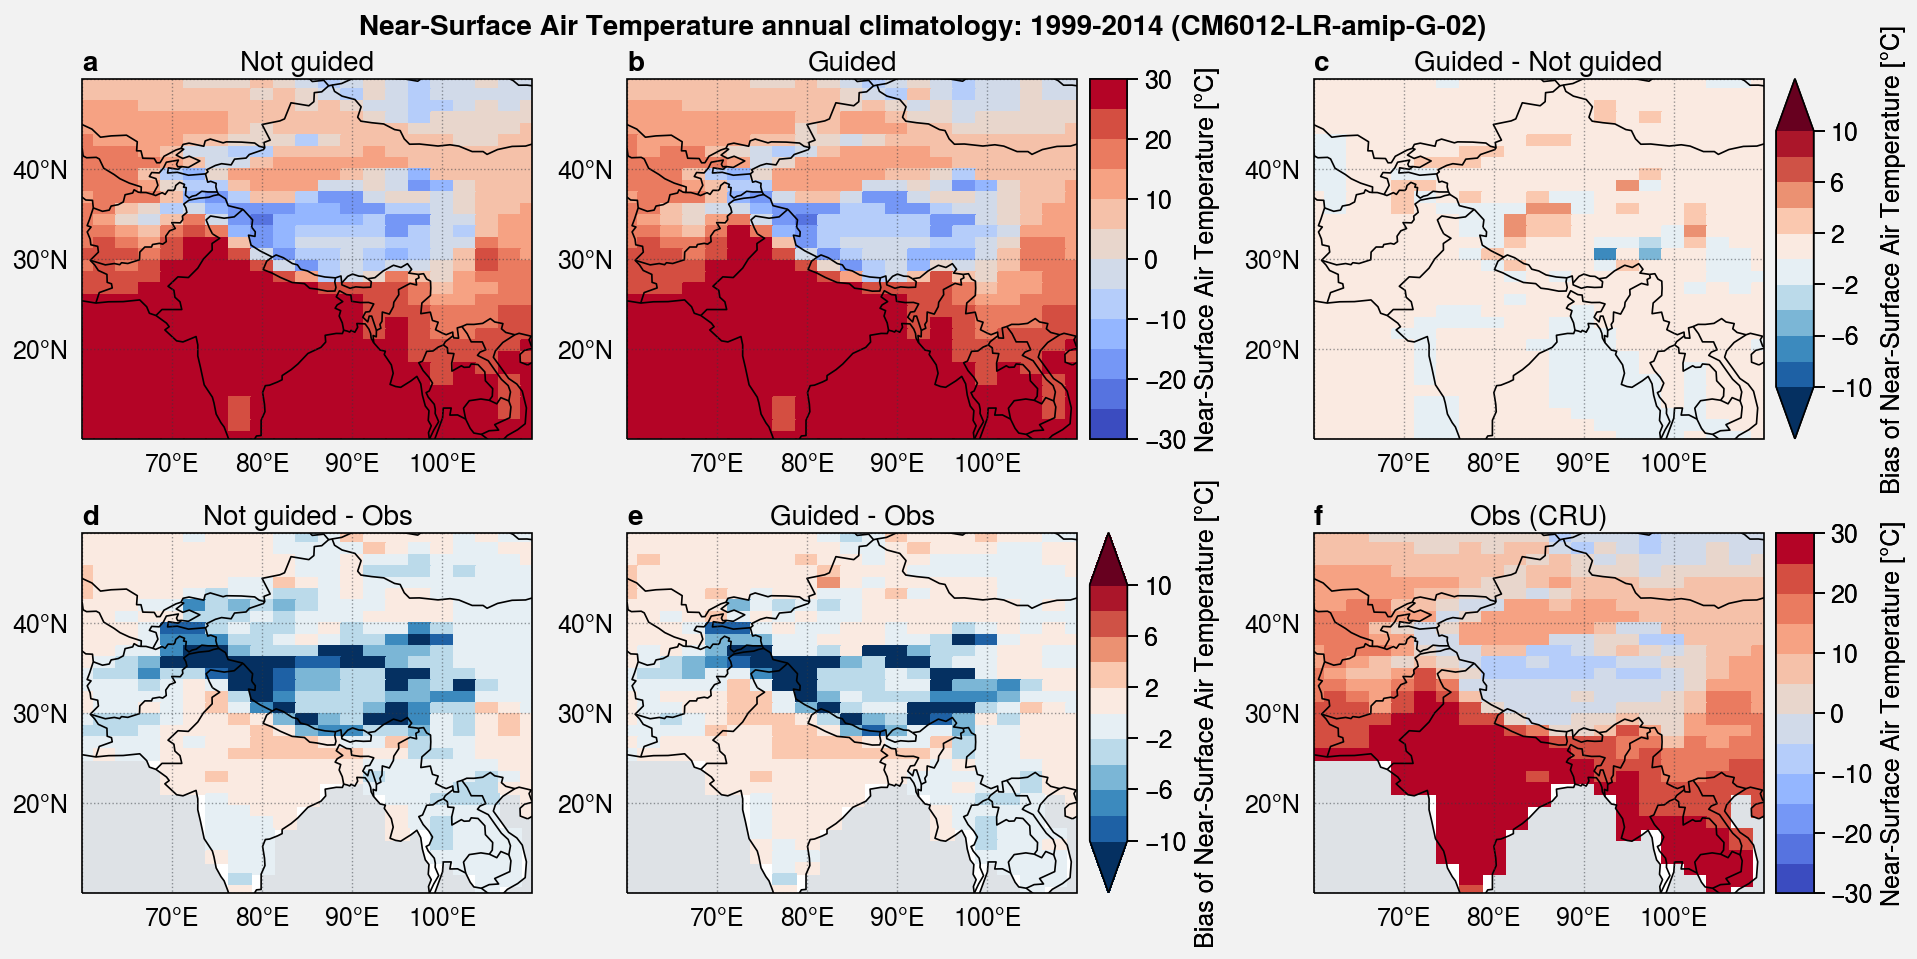

In [62]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-10,10,2)
cmap_dif = 'BuRd'
extend_diff = 'both'

# First row: differences guided / not guide
axs[0].pcolormesh(model_clim, cmap=cmap, levels=levels)
axs[0].format(title='Not guided')

m1 = axs[1].pcolormesh(model_guided_clim, cmap=cmap, levels=levels)
axs[1].format(title='Guided')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_guided_clim - model_clim, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title='Guided - Not guided')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title='Not guided - Obs')

axs[4].pcolormesh(model_guided_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title='Guided - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop+" (CM6012-LR-amip-G-02)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')